<a href="https://colab.research.google.com/github/OrJaku/chat-application/blob/master/digits_rec_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
import numpy as np
import pandas as ps
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import os 

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/Handwritten_digital"

/content/drive/My Drive/Colab Notebooks/Handwritten_digital


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
(train_images_origin, train_labels_origin), (test_images_origin, test_labels_origin) = mnist.load_data()

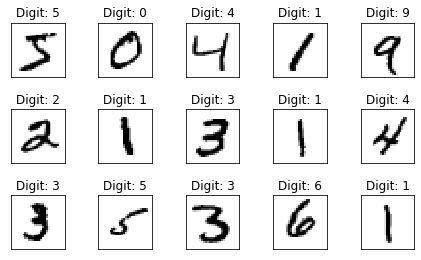

In [64]:
fig = plt.figure()
for i in range(3*5):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images_origin[i], cmap='gist_yarg')
  plt.title("Digit: {}".format(train_labels_origin[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [158]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255


train_images_val = train_images[10000:]
train_labels_val = train_labels[10000:]

val_images = train_images[:10000]
val_labels = train_labels[:10000]

val_images.shape

(10000, 784)

In [159]:
train_labels_val = to_categorical(train_labels_val)
print(train_labels_val.shape)
test_labels = to_categorical(test_labels)
print(test_labels.shape)
val_labels = to_categorical(val_labels)
print(test_labels.shape)


(50000, 10)
(10000, 10)
(10000, 10)


In [0]:
network = models.Sequential()
network.add(layers.Dense(
                        512, 
                        activation='relu', 
                        input_shape=(28*28,),
                        ))

network.add(layers.Dense(
                        512, 
                        activation='relu',
                        ))

network.add(layers.Dense(
                        10, 
                        activation='softmax',
                         ))

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 8s - loss: 0.2429 - acc: 0.9270 - val_loss: 0.1221 - val_acc: 0.9644
Epoch 2/20
 - 7s - loss: 0.0873 - acc: 0.9724 - val_loss: 0.0834 - val_acc: 0.9745
Epoch 3/20
 - 8s - loss: 0.0545 - acc: 0.9825 - val_loss: 0.0742 - val_acc: 0.9778
Epoch 4/20
 - 8s - loss: 0.0370 - acc: 0.9877 - val_loss: 0.0786 - val_acc: 0.9762
Epoch 5/20
 - 8s - loss: 0.0280 - acc: 0.9910 - val_loss: 0.0806 - val_acc: 0.9788
Epoch 6/20
 - 7s - loss: 0.0223 - acc: 0.9926 - val_loss: 0.0860 - val_acc: 0.9766
Epoch 7/20
 - 8s - loss: 0.0184 - acc: 0.9941 - val_loss: 0.1055 - val_acc: 0.9758
Epoch 8/20
 - 7s - loss: 0.0178 - acc: 0.9940 - val_loss: 0.0889 - val_acc: 0.9774
Epoch 9/20
 - 7s - loss: 0.0175 - acc: 0.9939 - val_loss: 0.0789 - val_acc: 0.9797
Epoch 10/20
 - 7s - loss: 0.0137 - acc: 0.9955 - val_loss: 0.0838 - val_acc: 0.9803
Epoch 11/20
 - 7s - loss: 0.0112 - acc: 0.9961 - val_loss: 0.0933 - val_acc: 0.9785
Epoch 12/20
 - 7s - loss: 0.0083 - 

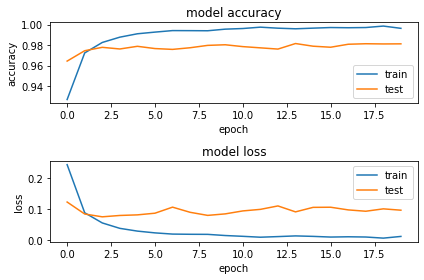

In [160]:
history = network.fit(
    train_images_val, 
    train_labels_val, 
    epochs=20, 
    batch_size=128, 
    verbose=2,
    validation_data=(val_images, val_labels))
save_file = 'data/'
model_name = 'model_mnist.h5'
model_path = os.path.join(save_file, model_name)
network.save(model_path)
print('Saved trained model at %s ' % model_path)

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [93]:
model = network.load_weights('data/model_mnist.h5')
print(type(model))


<class 'keras.engine.sequential.Sequential'>


In [161]:
loss_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 70us/step


In [162]:
print('loss= ', loss_acc[0])
print("acc= ", loss_acc[1])

loss=  0.0989786703375959
acc=  0.9802
